In [75]:
!pip install missingno

In [ ]:
!pip install catboost

In [ ]:
!pip install xgboost

In [ ]:
!pip install category_encoders


# Projeto end-to-end de Ciência de Dados

  Neste projeto vamos resolver o problema de uma empresa de seguros, para isso faremos todas as etapas do processo de desenvolvimento de um modelo seguindo a metodologia CRISP-DM.

### **Introdução**



### **Avaliação do Modelo (Sugerido pelo Cliente)**
Métrica de Pontuação
As submissões são avaliadas usando o **Coeficiente Gini Normalizado**.

O Coeficiente Gini Normalizado ajusta a pontuação pelo máximo teórico, de modo que a pontuação máxima é 1.
___

# 1) Entendimento do problema de Negócio
   Construir um **modelo que preveja a probabilidade de prever se um cliente vai pagar ou não quando eftuasse um determinado pedido de solictação de crédito**



# 2) Entendimento dos Dados

Para este projeto utilizaremos os dados disponibilizados pela seguradora Porto Seguro no ambiente Kaggle:

https://www.kaggle.com/competitions/porto-seguro-safe-driver-prediction/data





#### Bibliotecas que serão utilizadas no projeto

- pod_academy_functions é a nossa biblioteca criada no curso de DS

In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import pod_academy_functions as pod
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, f1_score
from IPython.core.display import HTML
from IPython.display import Image
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import gc
# import dataframe_image as dfi
import warnings
warnings.filterwarnings("ignore")

#### Lendo os dados disponibilizados

In [77]:
df_application = pd.read_csv('/application_train.csv')
df_application.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50
215252,239009,0,Cash loans,F,N,Y,0,121500.0,675000.0,32602.5,...,0.214615,0.915096,0.760514,0.720699,0.875196,0.206345,0.359596,0.937269,0.699642,0.231518
215253,399937,0,Cash loans,F,N,N,2,225000.0,509922.0,40419.0,...,0.103347,0.958918,0.271508,0.308291,0.566643,0.942430,0.771174,0.495740,0.451506,0.601316
215254,253016,0,Cash loans,M,Y,Y,0,450000.0,1125000.0,33025.5,...,0.572026,0.709654,0.523142,0.424053,0.269128,0.789032,0.725667,0.160264,0.250138,0.573689
215255,270275,0,Revolving loans,M,Y,Y,1,180000.0,270000.0,13500.0,...,0.421224,0.175427,0.932756,0.585846,0.671286,0.519467,0.849646,0.485528,0.161590,0.091153
215256,241394,1,Cash loans,M,Y,Y,0,157500.0,729792.0,35239.5,...,0.605445,0.741123,0.288505,0.696274,0.463532,0.651455,0.617544,0.817317,0.130288,0.220554


In [78]:
df_application.isna().sum() #Verificar se existe alguma existe dados nulos
print(f'Os dados nulos são:' )

Os dados nulos são:


In [79]:
def show_data_types(df_application):
    """ Função para trazer os datatatypes que estão no DataFrame """
    print(df_application.dtypes)

    return None

In [80]:
def show_dimensions(df_application):
    """ Função para trazer a dimensão do DataFrame """

    print(f"O número de linhas no DataFrame é de : {df_application.shape[0]}")
    print(f"Números de colunas existentes no Dataframe é : {df_application.shape[1]}")
    print(f"A base de dados é de : {df_application.shape}")

    return None

In [81]:
def check_nulos(df_application):
    """ Função para verifcar a existência de dados nulos ou ausente """
    df_aux = pd.DataFrame(df_application.isna().sum().sort_values(ascending=False), columns=['A quantidade de dados nulos no DataFrame'])
    size = df_application.shape[0]
    df_aux['Percentagem de dados nulos'] = 100*df_aux/size
    df_aux = df_aux.sort_values(by='Percentagem de dados nulos', ascending=False)

    return df_aux

<Axes: >

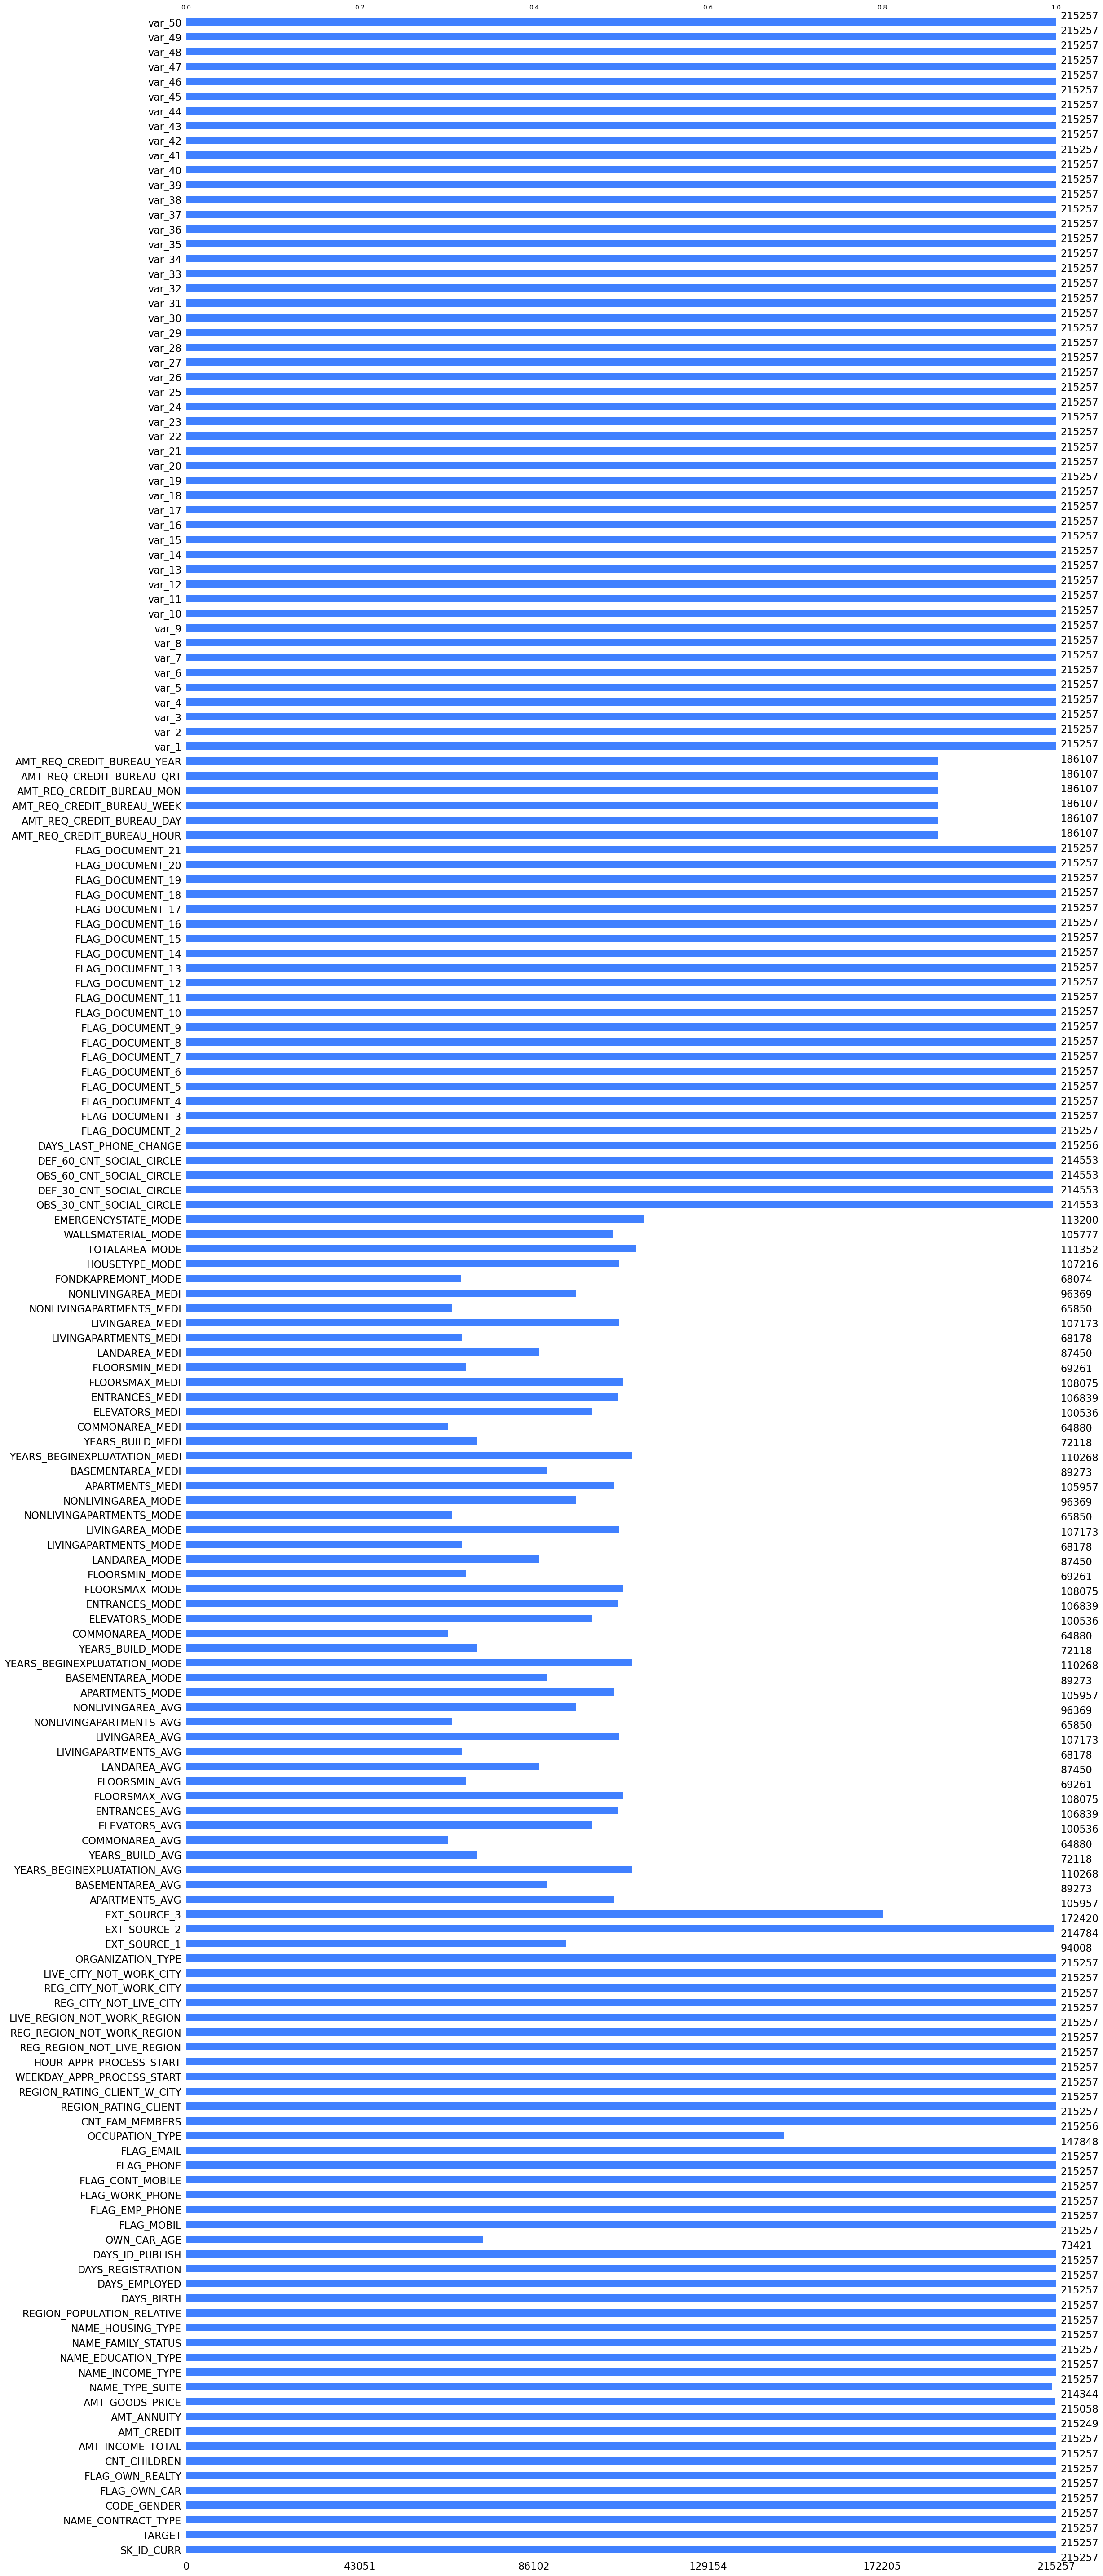

In [82]:
import missingno as msno
msno.bar(df_application, color=(0.25, 0.5, 1))  # ANÁLISE VISUAL DAS COLUNAS COM DADOS NULOS

In [83]:
# substituindo nulos por "Desconhecido" para categóricas
categorical_cols = df_application.select_dtypes(include=['object']).columns
df_application[categorical_cols] = df_application[categorical_cols].fillna('Desconhecido')
df_application.shape

(215257, 172)

# TIPOS DOS DADOS

In [84]:
show_data_types(df_application)

SK_ID_CURR              int64
TARGET                  int64
NAME_CONTRACT_TYPE     object
CODE_GENDER            object
FLAG_OWN_CAR           object
                       ...   
var_46                float64
var_47                float64
var_48                float64
var_49                float64
var_50                float64
Length: 172, dtype: object


# DIMENSÃO DA BASE DE DADOS

In [85]:
show_dimensions(df_application)

O número de linhas no DataFrame é de : 215257
Números de colunas existentes no Dataframe é : 172
A base de dados é de : (215257, 172)


# CHECAR DADOS NULOS NO DATAFRAME

In [86]:
df_aux = check_nulos(df_application)
df_aux.head(170)

,A quantidade de dados nulos no DataFrame,Percentagem de dados nulos
COMMONAREA_MODE,150377,69.859284
COMMONAREA_AVG,150377,69.859284
COMMONAREA_MEDI,150377,69.859284
NONLIVINGAPARTMENTS_AVG,149407,69.408660
NONLIVINGAPARTMENTS_MEDI,149407,69.408660
...,...,...
var_15,0,0.000000
var_32,0,0.000000
var_34,0,0.000000
var_49,0,0.000000


In [87]:
vars = (df_aux[df_aux['Percentagem de dados nulos'] < 60]).index.to_list()
print('O númuero de variavéis descartadas é : {}'.format(df_application.shape[1]- len(vars)))

df_application = df_application[vars]

del vars


O númuero de variavéis descartadas é : 16


In [88]:
def eliminar_dados_incorretos_gander(df_application):
    """ Função para eliminar os dados incorretos na coluna de GENDER -> XNA"""

    df_application= df_application[df_application['CODE_GENDER'] != 'XNA']

In [89]:
eliminar_dados_incorretos_gander(df_application) # Eliminar dados XNA na coluna de GENDER

# TRANSFORMAR AS COLUNAS CATEGÓRICAS EM BINÁRIAS

In [90]:
# def change_to_binary(df_application, columns):
#     """ Transformar as variavéis categóricas em binárias """

#     for bin_feature in columns:
#         df_application[bin_feature], unique = pd.factorize(df_application[bin_feature])

#     return df_application

In [91]:
df_application.columns

Index(['LANDAREA_MODE', 'LANDAREA_AVG', 'LANDAREA_MEDI', 'BASEMENTAREA_MODE',
       'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'EXT_SOURCE_1',
       'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE',
       ...
       'var_17', 'var_16', 'var_31', 'var_15', 'var_32', 'var_34', 'var_49',
       'var_48', 'var_47', 'var_50'],
      dtype='object', length=156)

In [92]:
# var_cat = ['CODE_GENDER']
# df_application = change_to_binary(df_application, var_cat)

# del var_cat


# ESTATÍSTICA DESCRITIVA

In [93]:
num_attributes = df_application.select_dtypes(exclude=['int32', 'int64', 'float64', 'float32', 'float16'])
cat_att = df_application.select_dtypes(exclude=['int32', 'int8', 'int64', 'float64', 'float32', 'float16', 'datetime64[ns]'])

# VISUALIZAÇÃO DAS ESTATÍSTICAS REFERENTE AOS ATRÍBUTOS NÚMERICOS

In [94]:
import pandas as pd
import numpy as np

def show_att_numeric(df_application):
    ''' Função utilizada para exibir informações de estatística descritiva'''
    # Seleciona apenas as colunas numéricas do DataFrame
    numeric_columns = df_application.select_dtypes(include=[np.number])
    
    # Central Tendency - mean, median
    ct1 = pd.DataFrame(numeric_columns.apply(np.mean)).T
    ct2 = pd.DataFrame(numeric_columns.apply(np.median)).T

    # Dispersion - std, min, max, range, skew, kurtosis
    d1 = pd.DataFrame(numeric_columns.apply(np.std)).T
    d2 = pd.DataFrame(numeric_columns.apply(min)).T
    d3 = pd.DataFrame(numeric_columns.apply(max)).T
    d4 = pd.DataFrame(numeric_columns.apply(lambda x: x.max() - x.min())).T
    d5 = pd.DataFrame(numeric_columns.apply(lambda x: x.skew())).T
    d6 = pd.DataFrame(numeric_columns.apply(lambda x: x.kurtosis())).T

    df_descriptive = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
    df_descriptive.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
    return df_descriptive


In [95]:
show_att_numeric(df_application)

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,LANDAREA_MODE,NaN,NaN,1.000000,0.064933,NaN,0.081217,4.301795,32.353331
1,LANDAREA_AVG,NaN,NaN,1.000000,0.066406,NaN,0.080947,4.399267,33.980842
2,LANDAREA_MEDI,NaN,NaN,1.000000,0.067219,NaN,0.081833,4.303083,32.428317
3,BASEMENTAREA_MODE,0.000000e+00,1.000000,1.000000,0.087627,NaN,0.084345,3.456964,24.059851
4,BASEMENTAREA_MEDI,0.000000e+00,1.000000,1.000000,0.088059,NaN,0.082162,3.513052,25.285076
...,...,...,...,...,...,...,...,...,...
135,var_34,5.791025e-07,0.999990,0.999989,0.500245,0.500919,0.288543,-0.001669,-1.200556
136,var_49,1.708806e-05,0.999975,0.999958,0.499476,0.499258,0.288684,0.000983,-1.200338
137,var_48,1.014202e-05,0.999994,0.999984,0.500618,0.502229,0.288285,-0.004207,-1.199653
138,var_47,7.727734e-06,0.999997,0.999989,0.499781,0.499138,0.288410,0.001584,-1.199109


In [96]:
cat_att.apply(lambda x: x.unique().shape[0]) #Visualização dos dados únicos nas colunas categóricas

OCCUPATION_TYPE               19
NAME_EDUCATION_TYPE            5
WEEKDAY_APPR_PROCESS_START     7
NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                8
NAME_INCOME_TYPE               8
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
ORGANIZATION_TYPE             58
HOUSETYPE_MODE                 4
WALLSMATERIAL_MODE             8
EMERGENCYSTATE_MODE            3
FONDKAPREMONT_MODE             5
dtype: int64

In [97]:
# Interpolação linear
df_application = df_application.interpolate(method='linear')



In [98]:
df_application

,LANDAREA_MODE,LANDAREA_AVG,LANDAREA_MEDI,BASEMENTAREA_MODE,BASEMENTAREA_MEDI,BASEMENTAREA_AVG,EXT_SOURCE_1,NONLIVINGAREA_MEDI,NONLIVINGAREA_AVG,NONLIVINGAREA_MODE,...,var_17,var_16,var_31,var_15,var_32,var_34,var_49,var_48,var_47,var_50
0,NaN,NaN,NaN,0.109000,0.10500,0.10500,NaN,NaN,NaN,NaN,...,0.398762,0.813237,0.322195,0.972640,0.677877,0.284267,0.723331,0.092643,0.415562,0.796523
1,NaN,NaN,NaN,0.235250,0.22665,0.22665,0.593456,NaN,NaN,NaN,...,0.906016,0.347189,0.985735,0.720867,0.547768,0.392172,0.585643,0.608335,0.838892,0.298456
2,0.380400,0.372000,0.378400,0.361500,0.34830,0.34830,0.595497,0.000000,0.000000,0.00000,...,0.651399,0.007019,0.737803,0.578306,0.399106,0.348174,0.361873,0.559650,0.594523,0.254804
3,0.006800,0.008500,0.008800,0.000000,0.00000,0.00000,0.597538,0.000000,0.000000,0.00000,...,0.242511,0.795626,0.683468,0.754668,0.365466,0.670943,0.603002,0.216664,0.755163,0.429001
4,0.055200,0.054900,0.055950,0.055700,0.05365,0.05365,0.599579,0.004200,0.004100,0.00435,...,0.492793,0.203080,0.108121,0.037144,0.472345,0.746089,0.540449,0.686738,0.619551,0.343632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215252,0.021567,0.021067,0.021433,0.129133,0.12440,0.12440,0.458144,0.001567,0.001533,0.00160,...,0.548861,0.745199,0.131315,0.997444,0.328700,0.921153,0.699642,0.937269,0.359596,0.231518
215253,0.043133,0.042133,0.042867,0.146467,0.14110,0.14110,0.455170,0.003133,0.003067,0.00320,...,0.164386,0.640642,0.590350,0.508653,0.794550,0.483662,0.451506,0.495740,0.771174,0.601316
215254,0.064700,0.063200,0.064300,0.163800,0.15780,0.15780,0.305919,0.004700,0.004600,0.00480,...,0.061021,0.715488,0.240322,0.420350,0.584371,0.567181,0.250138,0.160264,0.725667,0.573689
215255,0.085700,0.083800,0.085300,0.010200,0.00980,0.00980,0.611373,0.201500,0.197400,0.20890,...,0.674403,0.629172,0.113278,0.745754,0.037575,0.067025,0.161590,0.485528,0.849646,0.091153


<Axes: >

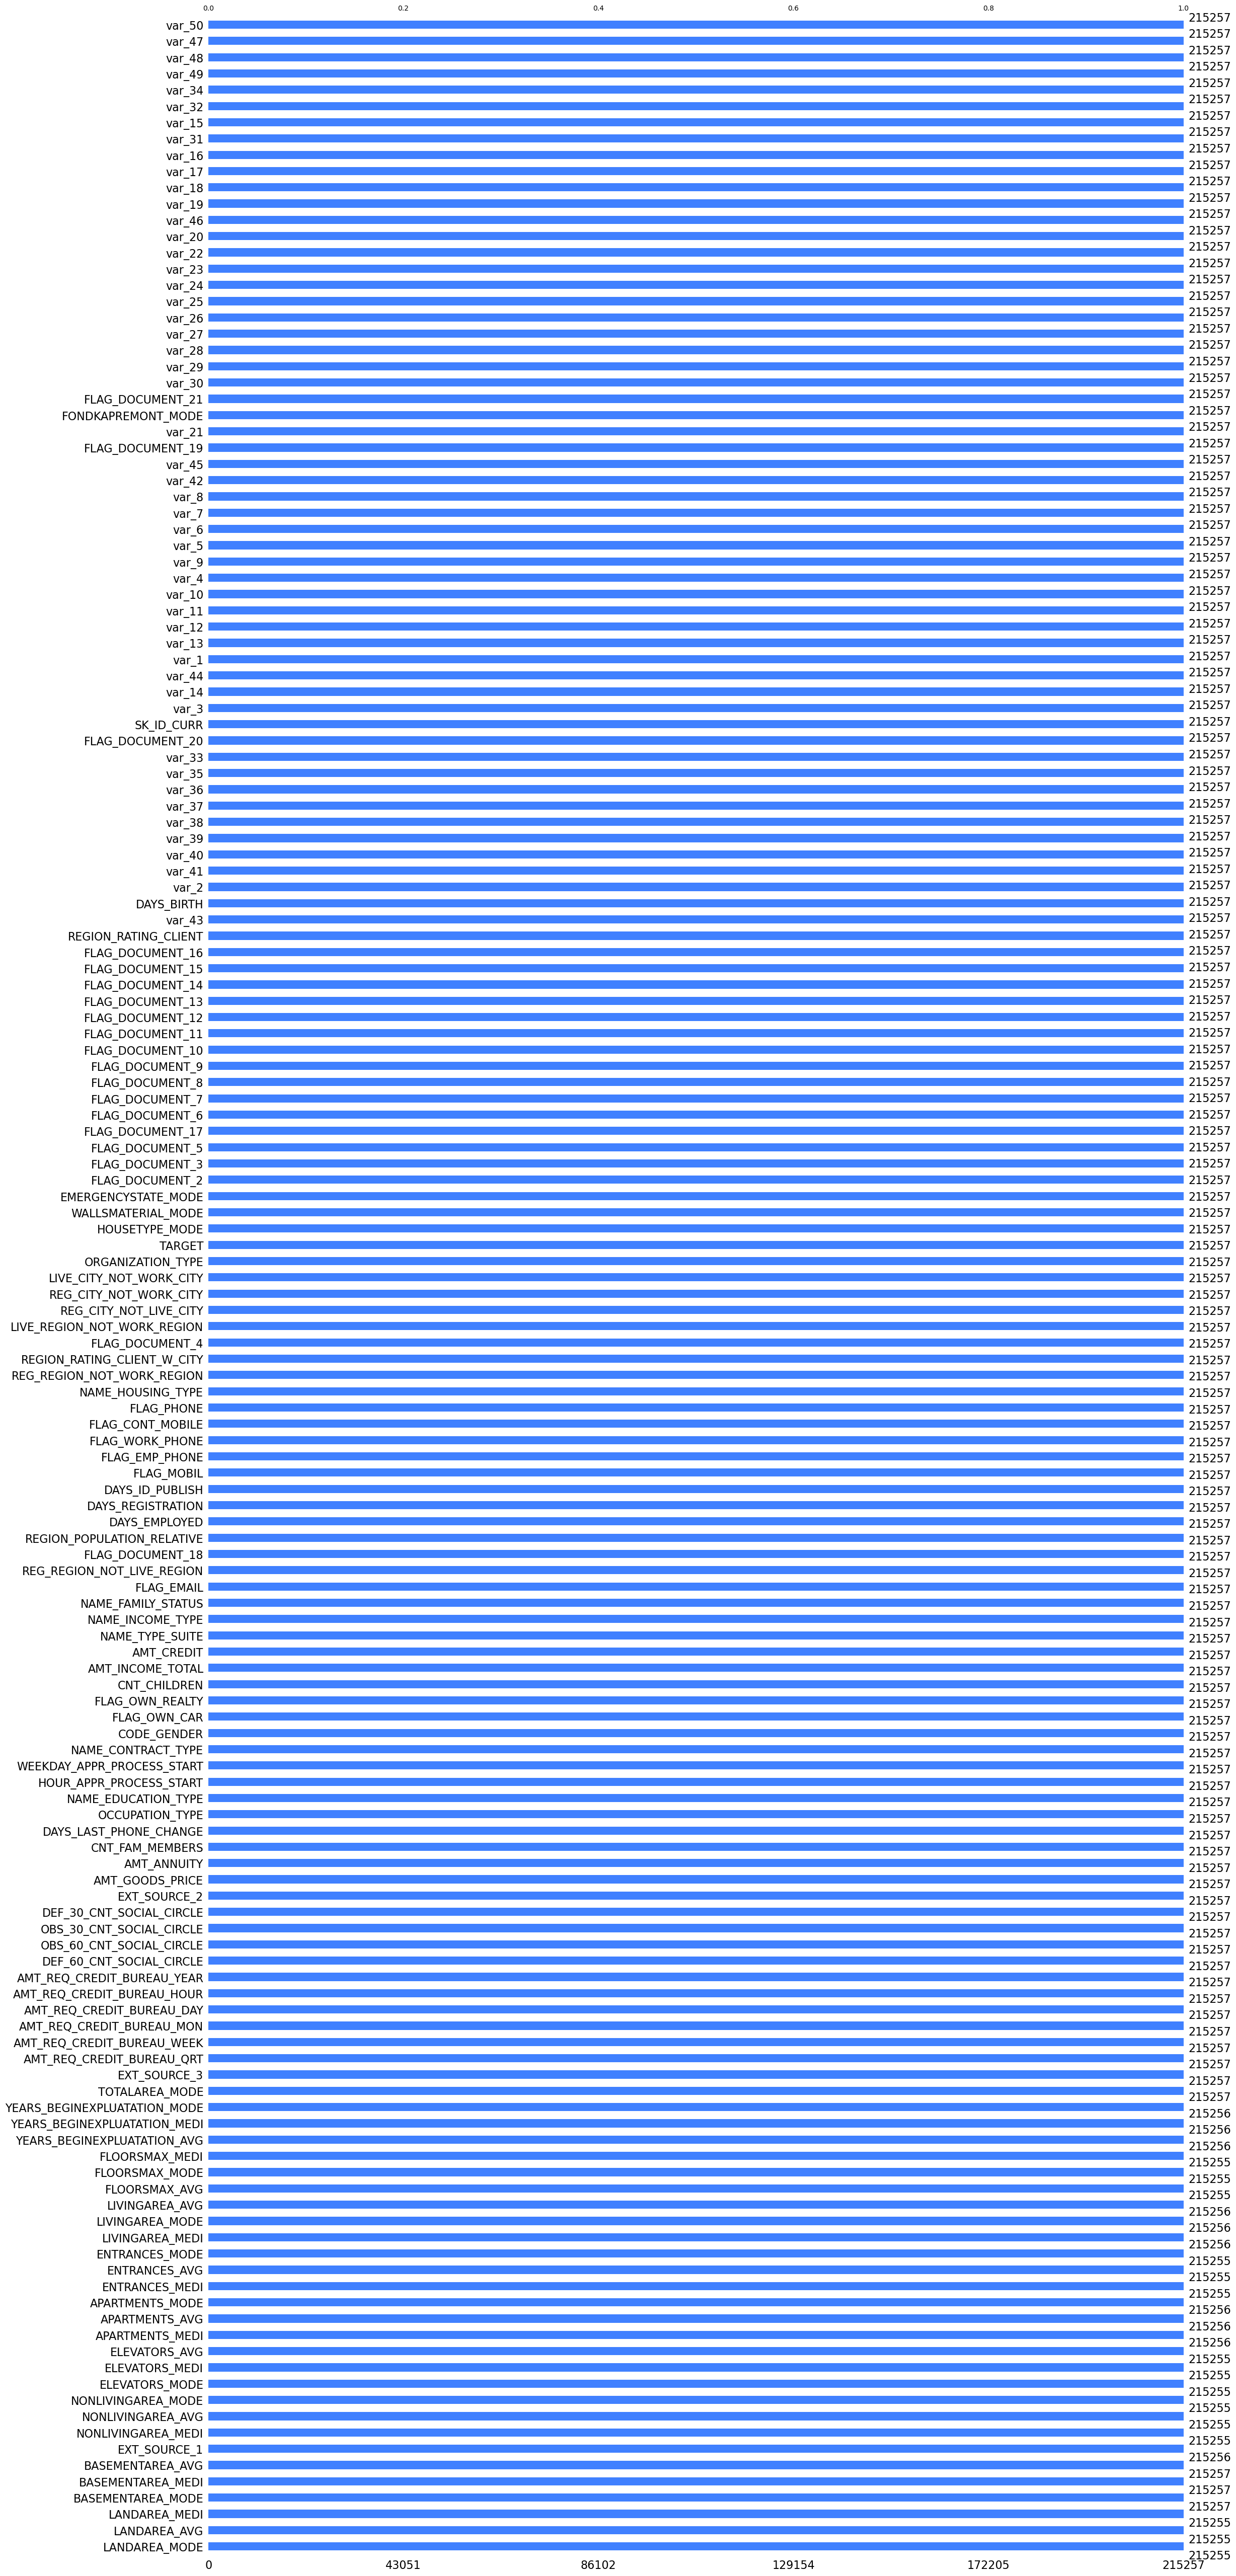

In [99]:
import missingno as msno
msno.bar(df_application, color=(0.25, 0.5, 1))  # ANÁLISE VISUAL DAS COLUNAS COM DADOS NULOS

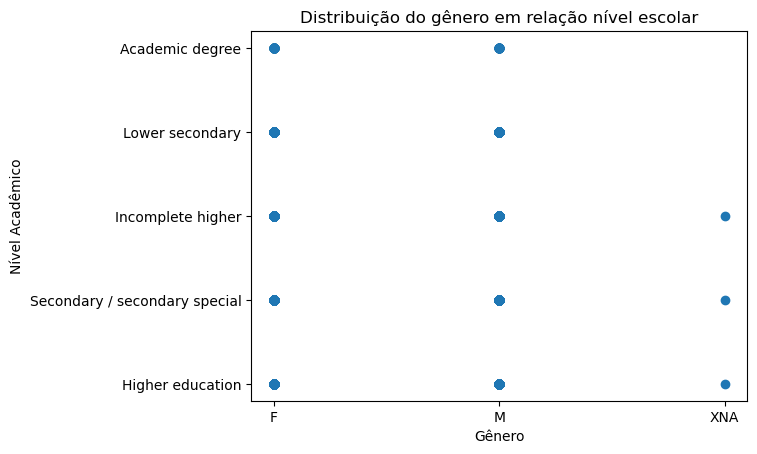

In [100]:
import matplotlib.pyplot as plt
plt.scatter(df_application['CODE_GENDER'], df_application['NAME_EDUCATION_TYPE'])
plt.xlabel('Gênero')
plt.ylabel('Nível Acadêmico')
plt.title('Distribuição do gênero em relação nível escolar')
plt.show()

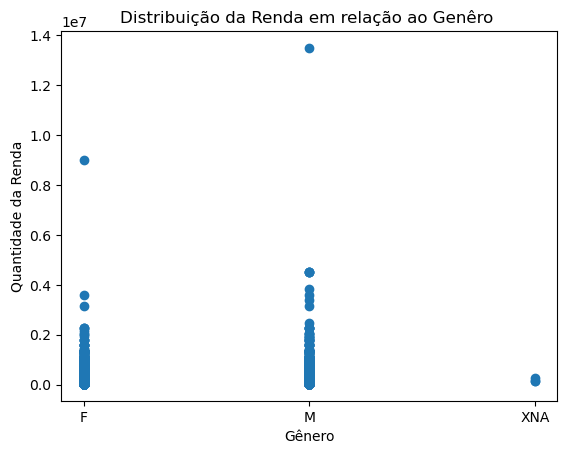

In [101]:
# Criar um gráfico de dispersão para visualizar a relação entre duas variáveis nas duas tabelas
plt.scatter(df_application['CODE_GENDER'], df_application['AMT_INCOME_TOTAL'])
plt.xlabel('Gênero')
plt.ylabel('Quantidade da Renda')
plt.title('Distribuição da Renda em relação ao Genêro ')
plt.show()

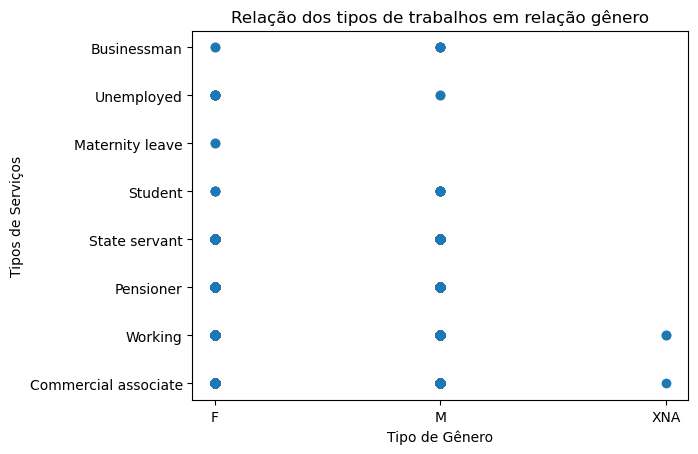

In [102]:
# Criar um gráfico de dispersão para visualizar a relação entre duas variáveis nas duas tabelas
plt.scatter(df_application['CODE_GENDER'], df_application['NAME_INCOME_TYPE'])
plt.xlabel('Tipo de Gênero')
plt.ylabel('Tipos de Serviços')
plt.title('Relação dos tipos de trabalhos em relação gênero')
plt.show()

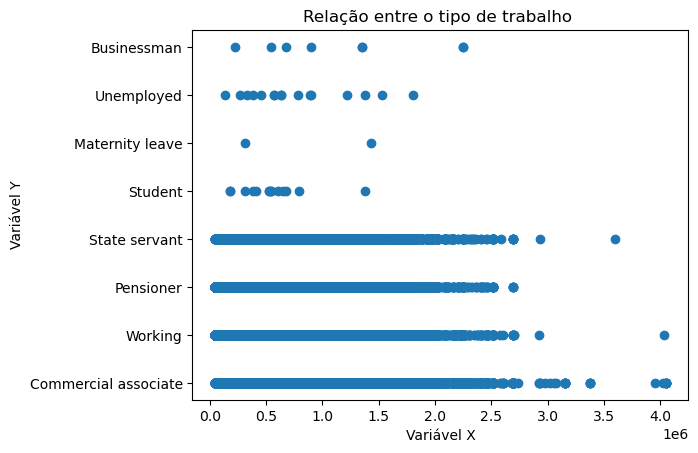

In [103]:
# Criar um gráfico de dispersão para visualizar a relação entre duas variáveis nas duas tabelas
plt.scatter(df_application['AMT_CREDIT'], df_application['NAME_INCOME_TYPE'])
plt.xlabel('Variável X')
plt.ylabel('Variável Y')
plt.title('Relação entre o tipo de trabalho ')
plt.show()

In [104]:
ed = df_application['AMT_CREDIT']
ed

0          706410.0
1          545040.0
2          942300.0
3          180000.0
4          729792.0
            ...    
215252     675000.0
215253     509922.0
215254    1125000.0
215255     270000.0
215256     729792.0
Name: AMT_CREDIT, Length: 215257, dtype: float64

In [105]:
plt.figure(figsize=(12, 8))

sns.countplot(x='CODE_GENDER', hue='NAME_CONTRACT_TYPE', data=df_application, palette='Set2', hue_order=['Cash loans', 'Revolving loans'], dodge=False)

plt.title('Relação entre Gênero, Tipo de Contrato e Nível de Escolaridade')
plt.xlabel('Gênero')
plt.ylabel('Contagem')

plt.legend(title='Tipo de Contrato')
plt.show()


NameError: name 'sns' is not defined

<Figure size 1200x800 with 0 Axes>

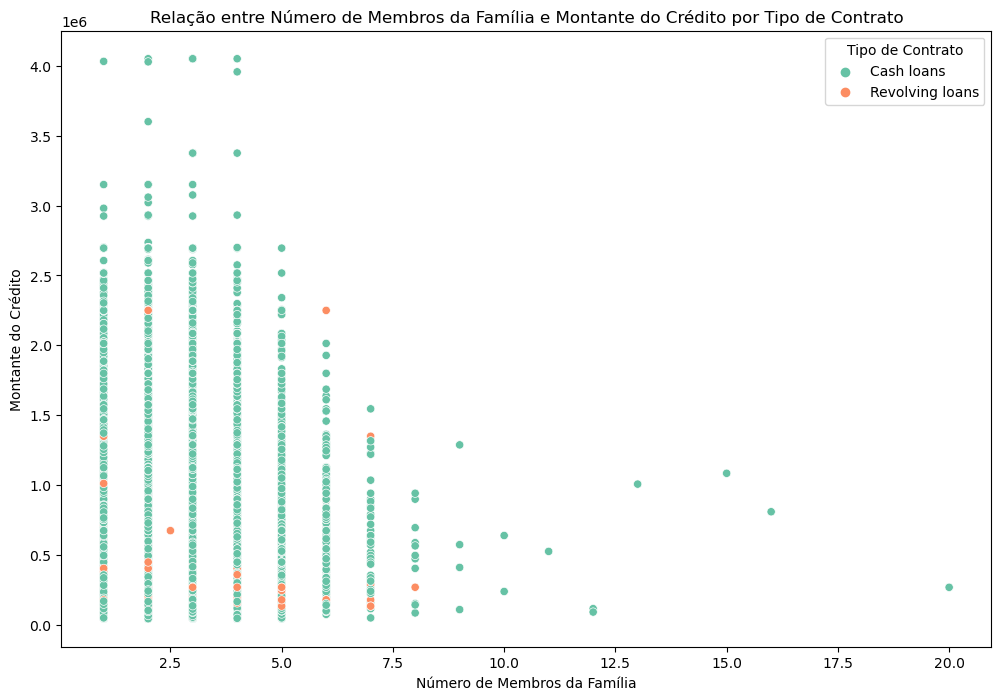

In [ ]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x='CNT_FAM_MEMBERS', y='AMT_CREDIT', hue='NAME_CONTRACT_TYPE', data=df_application, palette='Set2')

plt.title('Relação entre Número de Membros da Família e Montante do Crédito por Tipo de Contrato')
plt.xlabel('Número de Membros da Família')
plt.ylabel('Montante do Crédito')

plt.legend(title='Tipo de Contrato')
plt.show()


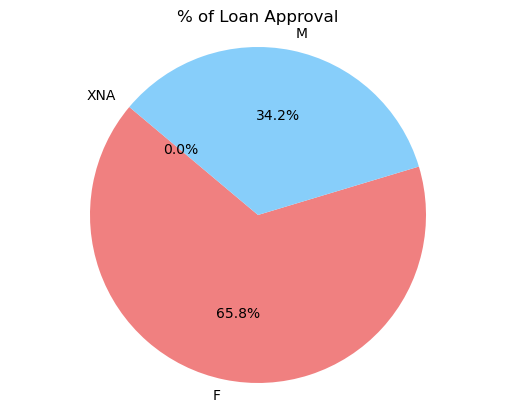

In [ ]:
y_counts = df_application['CODE_GENDER'].value_counts()
labels = y_counts.index
sizes = y_counts.values

colors = ['lightcoral', 'lightskyblue']

# Buat pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%.1f%%', startangle=140)
plt.axis('equal')
plt.title('% of Loan Approval')
plt.show()

In [ ]:
categorical_df = []
for col in df_application.columns:
    if df_application[col].nunique()<10:
        categorical_df.append(col)

print('categ numericals columns are {}'.format(categorical_df))

categ numericals columns are ['NAME_EDUCATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION', 'FLAG_DOCUMENT_18', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'NAME_HOUSING_TYPE', 'REG_REGION_NOT_WORK_REGION', 'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_4', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'TARGET', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'REGION_RATING_CLIENT', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT

ValueError: num must be an integer with 1 <= num <= 8, not 9

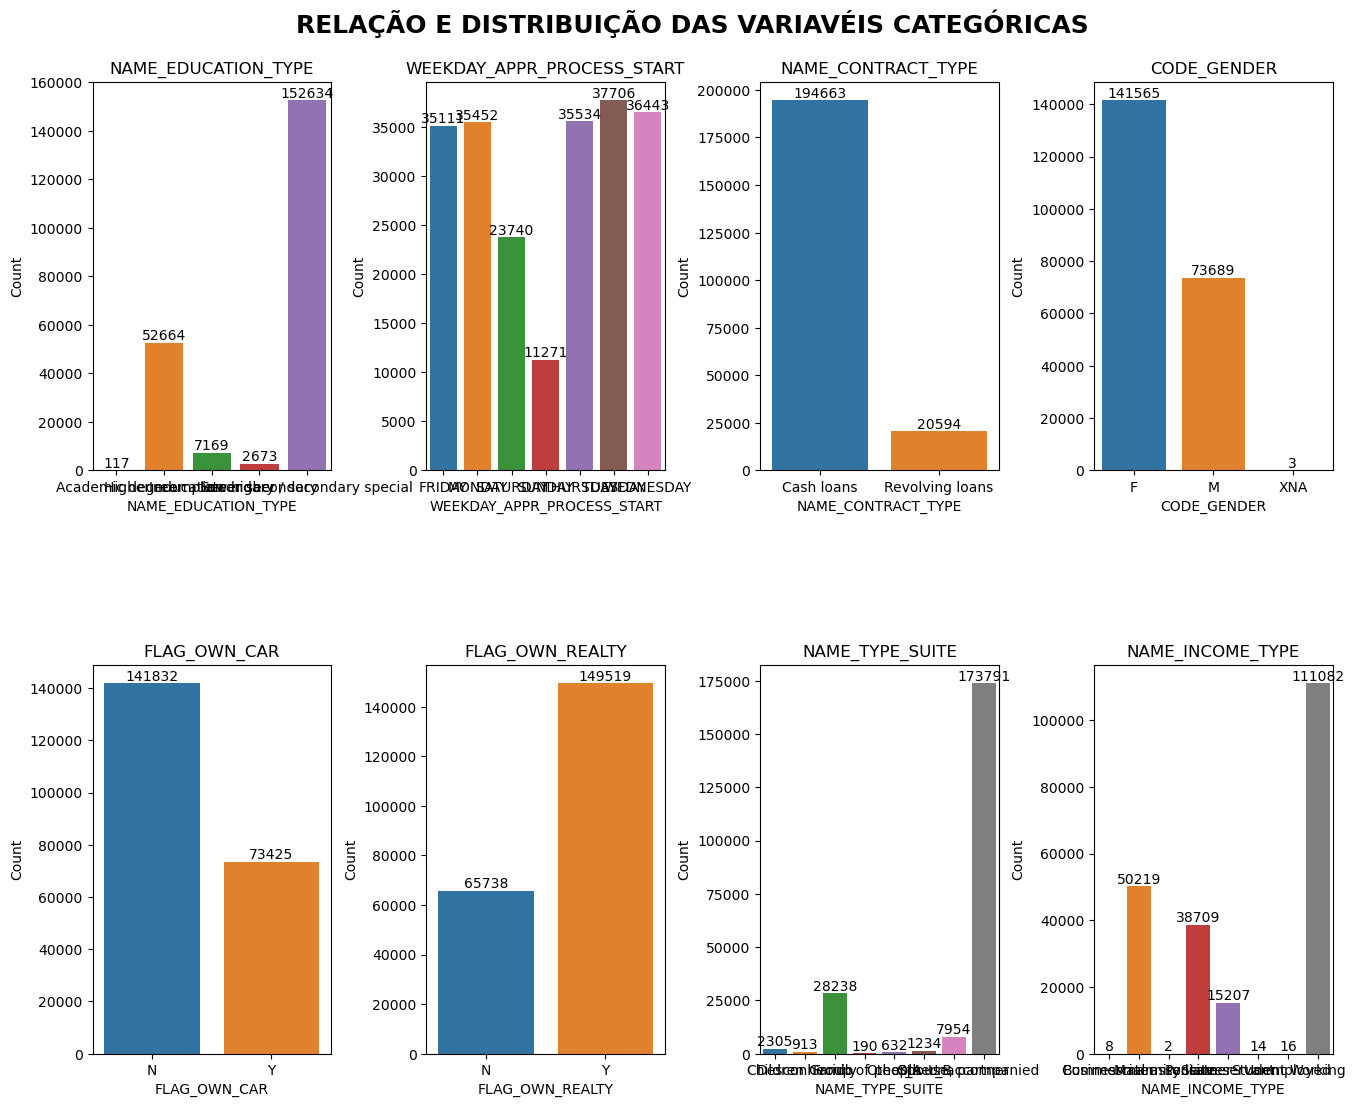

In [ ]:
fig = plt.figure(figsize=[16,12])
fig.suptitle('RELAÇÃO E DISTRIBUIÇÃO DAS VARIAVÉIS CATEGÓRICAS', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i , columns in enumerate(categorical_df):
    input = np.unique(df_application[columns] , return_counts = True)
    col= 'input'
    ax1 = fig.add_subplot(2, 4, i+1);
    ax1 = sns.barplot(x=list(eval(f'{col}[0]')), y=list(eval(f'{col}[1]')))
    ax1.set_title(f'{columns}')
    ax1.set_xlabel(f'{columns}')
    ax1.set_ylabel('Count')
    ax1.bar_label(ax1.containers[0])

In [ ]:
numerical_df = df_application.select_dtypes(include=['int64', 'float64'])
print(numerical_df.columns)

Index(['LANDAREA_MODE', 'LANDAREA_AVG', 'LANDAREA_MEDI', 'BASEMENTAREA_MODE',
       'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'EXT_SOURCE_1',
       'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE',
       ...
       'var_17', 'var_16', 'var_31', 'var_15', 'var_32', 'var_34', 'var_49',
       'var_48', 'var_47', 'var_50'],
      dtype='object', length=140)


ValueError: num must be an integer with 1 <= num <= 8, not 9

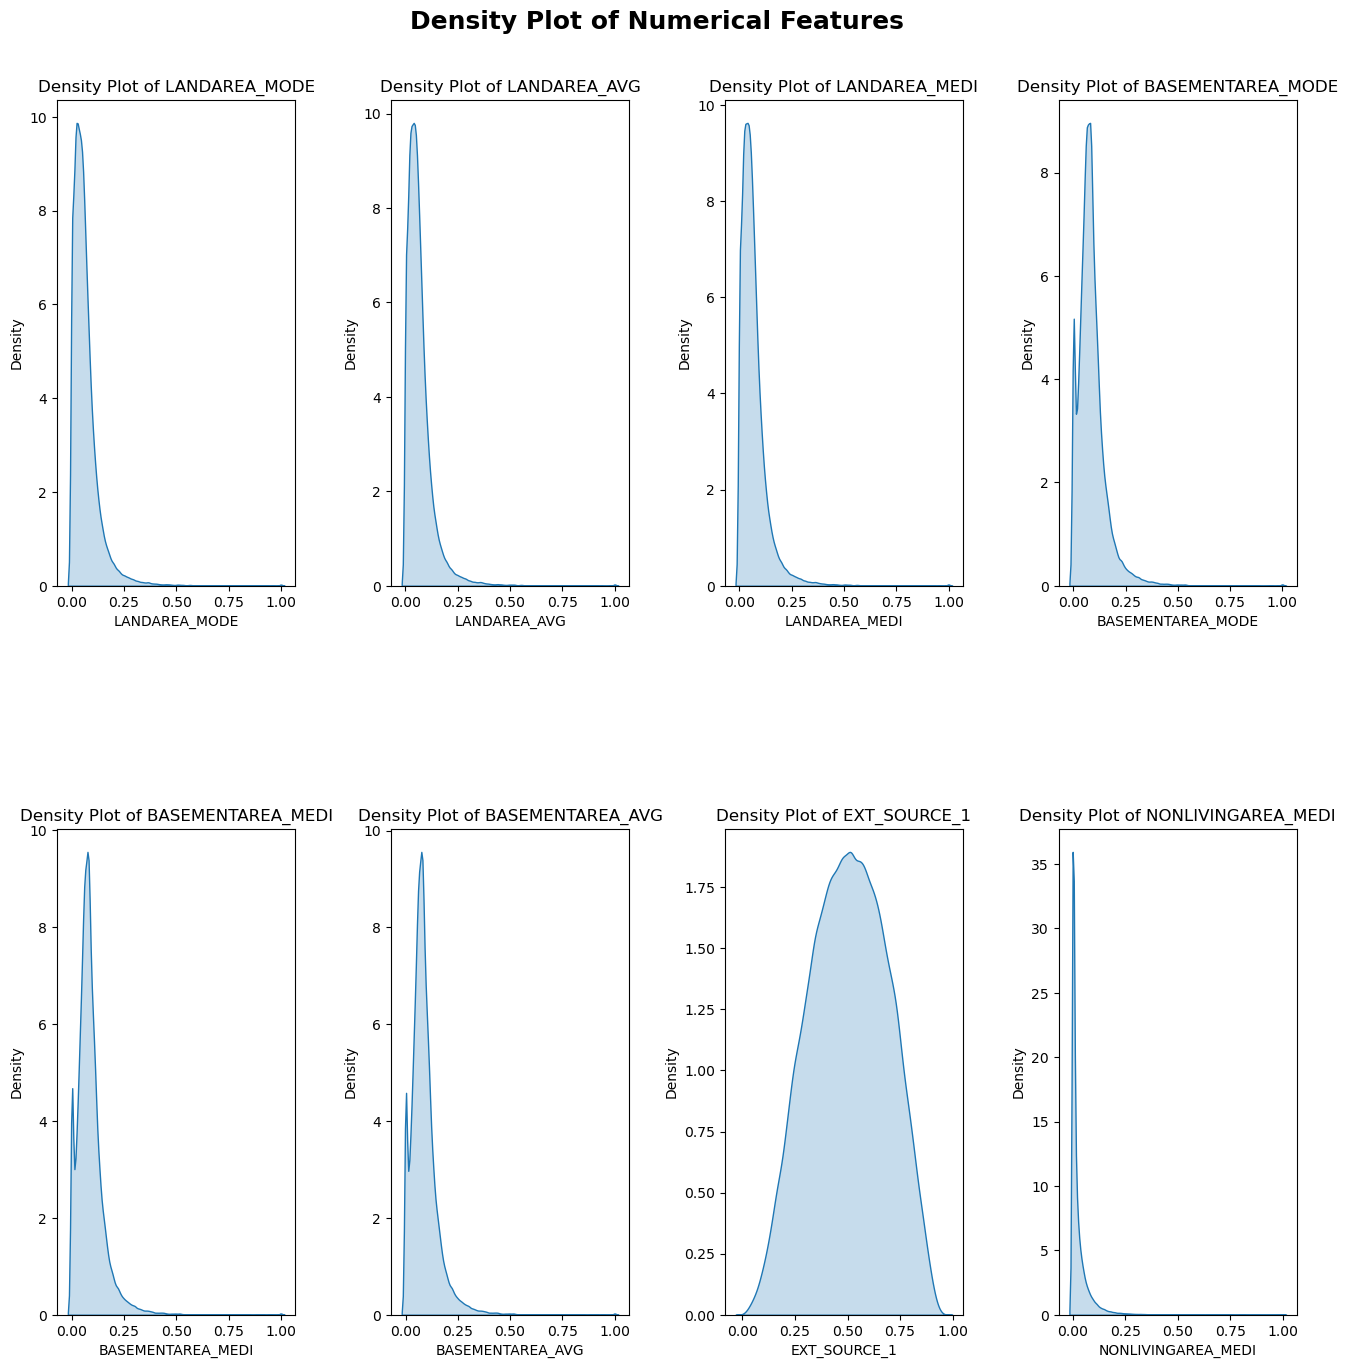

In [ ]:
# Set the figure size and title
fig = plt.figure(figsize=(16, 15))
fig.suptitle('Density Plot of Numerical Features', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)

# Loop through numerical columns and create density plots
for i, column in enumerate(numerical_df.columns):
    ax = fig.add_subplot(2, 4, i + 1)
    sns.kdeplot(data=numerical_df, x=column, fill=True, ax=ax)
    ax.set_title(f'Density Plot of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Density')

plt.show()

In [106]:
# Set the figure size and title
fig = plt.figure(figsize=(16, 15))
fig.suptitle('Density Plot of Numerical Features', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)

# Loop through numerical columns and create density plots
for i, column in enumerate(numerical_df.columns):
    ax = fig.add_subplot(2, 4, i + 1)
    sns.kdeplot(data=df_application[df_application['FLAG_OWN_REALTY'] == 'N'][column], color="Red", shade=True, label="Not Approval")
    sns.kdeplot(data=df_application[df_application['FLAG_OWN_REALTY'] == 'Y'][column], color="Blue", shade=True, label="Approval")
    ax.set_title(f'Density Plot of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Density')
    ax.legend()

plt.show()

NameError: name 'numerical_df' is not defined

<Figure size 1600x1500 with 0 Axes>

#### Separando dados para garantir validação cruzada Holdout 70/30

In [107]:
# Suponha que você queira separar 70% dos dados para treino e 30% para validaçã
X = df_application.drop(columns=['TARGET'])
y = df_application.TARGET

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

del df_application, X, y

In [108]:
num_attributes = X_train.select_dtypes(include=['int32', 'int8', 'int64', 'float64', 'float32', 'float16'])
cat_attributes = X_train.select_dtypes(exclude=['int32', 'int8', 'int64', 'float64', 'float32', 'float16', 'datetime64[ns]'])

In [111]:
# Define categorical pipeline
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    # ('imputer', SimpleImputer(strategy='constant',fill_value=0)),
    ('encoder', TargetEncoder())
])

# Define numerical pipeline
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
    # ('imputer', SimpleImputer(strategy='mean'))
])

# Combine categorical and numerical pipelines
preprocessor = ColumnTransformer([
    ('cat', cat_pipe, cat_attributes.columns),
    ('num', num_pipe, num_attributes.columns)
])

Quantidade de features no conjunto de dados inicial: 155
Quantidade de features selecionadas: 151


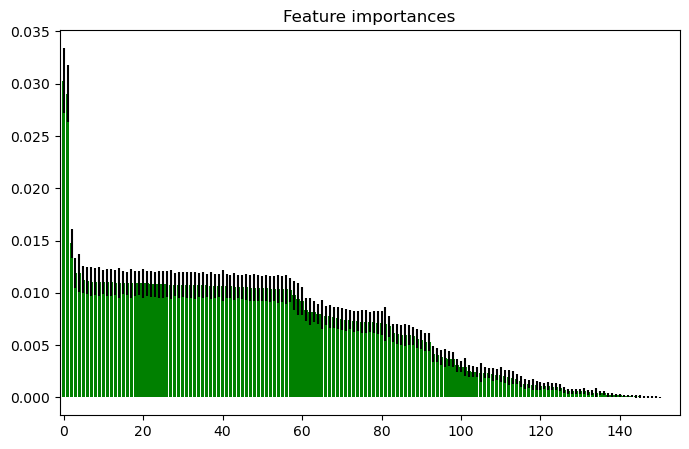

In [112]:
pipe_feature_importances = Pipeline([
                            ('preprocessor', preprocessor),
                            ('model', RandomForestClassifier())
])

pipe_feature_importances.fit(X_train, y_train)

importances = pipe_feature_importances['model'].feature_importances_
std         = np.std([tree.feature_importances_ for tree in pipe_feature_importances['model'].estimators_],
             axis=0)
indices     = np.argsort(importances)[::-1]

indices_selected_features=[]

for f in range(X_train.shape[1]):
    if importances[indices[f]] > 0: 
        indices_selected_features.append(indices[f])

print('Quantidade de features no conjunto de dados inicial: {}'.format(X_train.shape[1]))
print('Quantidade de features selecionadas: {}'.format(len(indices_selected_features)))

# Plot the feature importances of the forest
plt.figure(1, figsize=(8, 5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
# plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [113]:
# Lista das 10 Features mais importantes
indices_selected_features_top10 = indices_selected_features[:10]

# Exibir as 10 features mais importantes
print(X_train.columns[indices_selected_features_top10].to_list())

['NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'FLOORSMAX_AVG', 'NAME_HOUSING_TYPE', 'var_2', 'FLAG_PHONE', 'var_19', 'var_35', 'var_9', 'var_46']


In [ ]:
# Atualização do X_train e X_test com base em todas as features selecionadas
X_train = X_train[X_train.columns[indices_selected_features]]
X_test  = X_test[X_test.columns[indices_selected_features]]

In [ ]:
num_attributes = X_train.select_dtypes(include=['int32', 'int8', 'int64', 'float64', 'float32', 'float16'])
cat_attributes = X_train.select_dtypes(exclude=['int32', 'int8', 'int64', 'float64', 'float32', 'float16', 'datetime64[ns]'])

In [118]:
classifiers = [
    LogisticRegression(class_weight='balanced'),
    RandomForestClassifier(class_weight='balanced'),
    XGBClassifier(),
    lgb.LGBMClassifier(class_weight='balanced'),
    CatBoostClassifier(verbose=False)
]

# Define categorical pipeline
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    # ('imputer', SimpleImputer(strategy='constant',fill_value=0)),
    ('encoder', TargetEncoder())
])

# Define numerical pipeline
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
    # ('imputer', SimpleImputer(strategy='mean'))
])

# Combine categorical and numerical pipelines
preprocessor = ColumnTransformer([
    ('cat', cat_pipe, cat_attributes.columns),
    ('num', num_pipe, num_attributes.columns)
])

results = []
for classifier in classifiers:
    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", classifier)])
    pipe.fit(X_train, y_train)
    ypred = pipe.predict(X_test)
    y_pred_prob = pipe.predict_proba(X_test)[:,1]
    roc_auc = roc_auc_score(y_test,y_pred_prob)
    results.append(roc_auc)
    print(classifier)
    print("model score: %.4f" % pipe.score(X_test, y_test))
    print("model roc_auc_score: %.4f" % roc_auc)
    print("model classification report")
    print(classification_report(y_test, ypred))

del roc_auc, classifiers, cat_pipe, num_pipe, preprocessor

LogisticRegression(class_weight='balanced')
model score: 0.6837
model roc_auc_score: 0.7397
model classification report
              precision    recall  f1-score   support

           0       0.96      0.68      0.80     39580
           1       0.16      0.68      0.26      3472

    accuracy                           0.68     43052
   macro avg       0.56      0.68      0.53     43052
weighted avg       0.90      0.68      0.76     43052

RandomForestClassifier(class_weight='balanced')
model score: 0.9193
model roc_auc_score: 0.7009
model classification report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     39580
           1       0.33      0.00      0.00      3472

    accuracy                           0.92     43052
   macro avg       0.63      0.50      0.48     43052
weighted avg       0.87      0.92      0.88     43052

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, col

In [119]:
# Comparação entre a métrica ROC-AUC para os diversos modelos
df_roc_auc = pd.DataFrame(results,index=['LogisticRegression','Random Forest','XGBoost','LightGBM','Catboost'],columns=['ROC-AUC']).sort_values(by='ROC-AUC',ascending=False)
df_roc_auc

,ROC-AUC
LightGBM,0.749086
Catboost,0.747410
LogisticRegression,0.739677
XGBoost,0.727777
Random Forest,0.700916
